In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from random import shuffle
from tqdm import tqdm
import os

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [16]:
w = 32
h = 32
min_w = 32
min_h = 32

In [17]:
def pre_process(img):    
    resized = cv.resize(img, (w,w))
    return resized

In [18]:
def get_label(path):    
    if 'nolights' not in path:                
        return np.array([1,0])
    else:
        return np.array([0,1])
    return np.array([0,1])

In [19]:
def train_data_with_label(train_data, train_images = []):    
    for i in tqdm(os.listdir(train_data)):        
        path = os.path.join(train_data, i)        
        img = cv.imread(path)
        w,h,_ = img.shape
        if w < min_w or h < min_h:
            continue
        img = pre_process(img)
        label = get_label(train_data)
        train_images.append([np.array(img),label])              
    shuffle(train_images)
    return train_images

In [20]:
train_data = train_data_with_label('../images/train/video-2/lights')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 2411.96it/s]


In [21]:
len(train_data)

47

In [22]:
train_data = train_data_with_label('../images/train/video-2/nolights', train_data)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 2700.41it/s]


In [23]:
len(train_data)

84

In [24]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

In [30]:
tr_img_data = np.array([i[0] for i in train_data])
tr_lbl_data = np.array([i[1] for i in train_data])
print(len(tr_img_data))
print(len(tr_lbl_data))

84
84


In [32]:
model = Sequential()

model.add(InputLayer(input_shape=[w,h,3]))
model.add(Conv2D(filters=32, kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=50,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=80,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2,activation='softmax'))
optimizer = Adam(lr=1e-3)

model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x=tr_img_data,y=tr_lbl_data,epochs=50,batch_size=10)
model.summary()

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
84/84 [==============================] - ETA: 7s - loss: 6.2634 - acc: 0.300 - ETA: 1s - loss: 5.7854 - acc: 0.500 - ETA: 0s - loss: 5.7458 - acc: 0.420 - ETA: 0s - loss: 5.0115 - acc: 0.485 - 1s 15ms/step - loss: 4.4624 - acc: 0.4762
Epoch 2/50
84/84 [==============================] - ETA: 0s - loss: 1.0793 - acc: 0.800 - ETA: 0s - loss: 1.2699 - acc: 0.666 - ETA: 0s - loss: 1.2485 - acc: 0.625 - ETA: 0s - loss: 0.9741 - acc: 0.700 - ETA: 0s - loss: 0.9445 - acc: 0.725 - 0s 4ms/step - loss: 0.9383 - acc: 0.7143
Epoch 3/50
84/84 [==============================] - ETA: 0s - loss: 0.7971 - acc: 0.600 - ETA: 0s - loss: 0.5487 - acc: 0.700 - ETA: 0s - loss: 0.5454 - acc: 0.760 - ETA: 0s - loss: 0.4782 - acc: 0.785 - 0s 3ms/step - loss: 0.4452 - acc: 0.7857
Epoch 4/50
84/84 [==============================] - ETA: 0s - loss: 0.0644 - acc: 1.000 - ETA: 0s - loss: 0.1921 - acc: 0.966 - ETA: 0s - loss: 0.3323 - acc: 0.900 - ETA: 0s - lo

84/84 [==============================] - ETA: 0s - loss: 8.8186e-05 - acc: 1.000 - ETA: 0s - loss: 5.0670e-05 - acc: 1.000 - ETA: 0s - loss: 3.4831e-05 - acc: 1.000 - ETA: 0s - loss: 4.3476e-05 - acc: 1.000 - 0s 3ms/step - loss: 4.8605e-05 - acc: 1.0000
Epoch 32/50
84/84 [==============================] - ETA: 0s - loss: 2.0309e-05 - acc: 1.000 - ETA: 0s - loss: 5.6453e-05 - acc: 1.000 - ETA: 0s - loss: 3.5909e-05 - acc: 1.000 - ETA: 0s - loss: 6.4386e-05 - acc: 1.000 - 0s 3ms/step - loss: 6.9834e-05 - acc: 1.0000
Epoch 33/50
84/84 [==============================] - ETA: 0s - loss: 3.6810e-05 - acc: 1.000 - ETA: 0s - loss: 1.8638e-05 - acc: 1.000 - ETA: 0s - loss: 1.7301e-05 - acc: 1.000 - ETA: 0s - loss: 0.0014 - acc: 1.0000    - ETA: 0s - loss: 0.0011 - acc: 1.000 - 0s 4ms/step - loss: 0.0011 - acc: 1.0000
Epoch 34/50
84/84 [==============================] - ETA: 0s - loss: 3.8743e-06 - acc: 1.000 - ETA: 0s - loss: 1.9047e-04 - acc: 1.000 - ETA: 0s - loss: 1.6052e-04 - acc: 1.000 - E

In [37]:
    test_img = train_data[26][0]
    predict_data = test_img.reshape(-1,w,h,3)
    model_out = model.predict([predict_data])
    print(model_out)

[[7.985251e-06 9.999920e-01]]


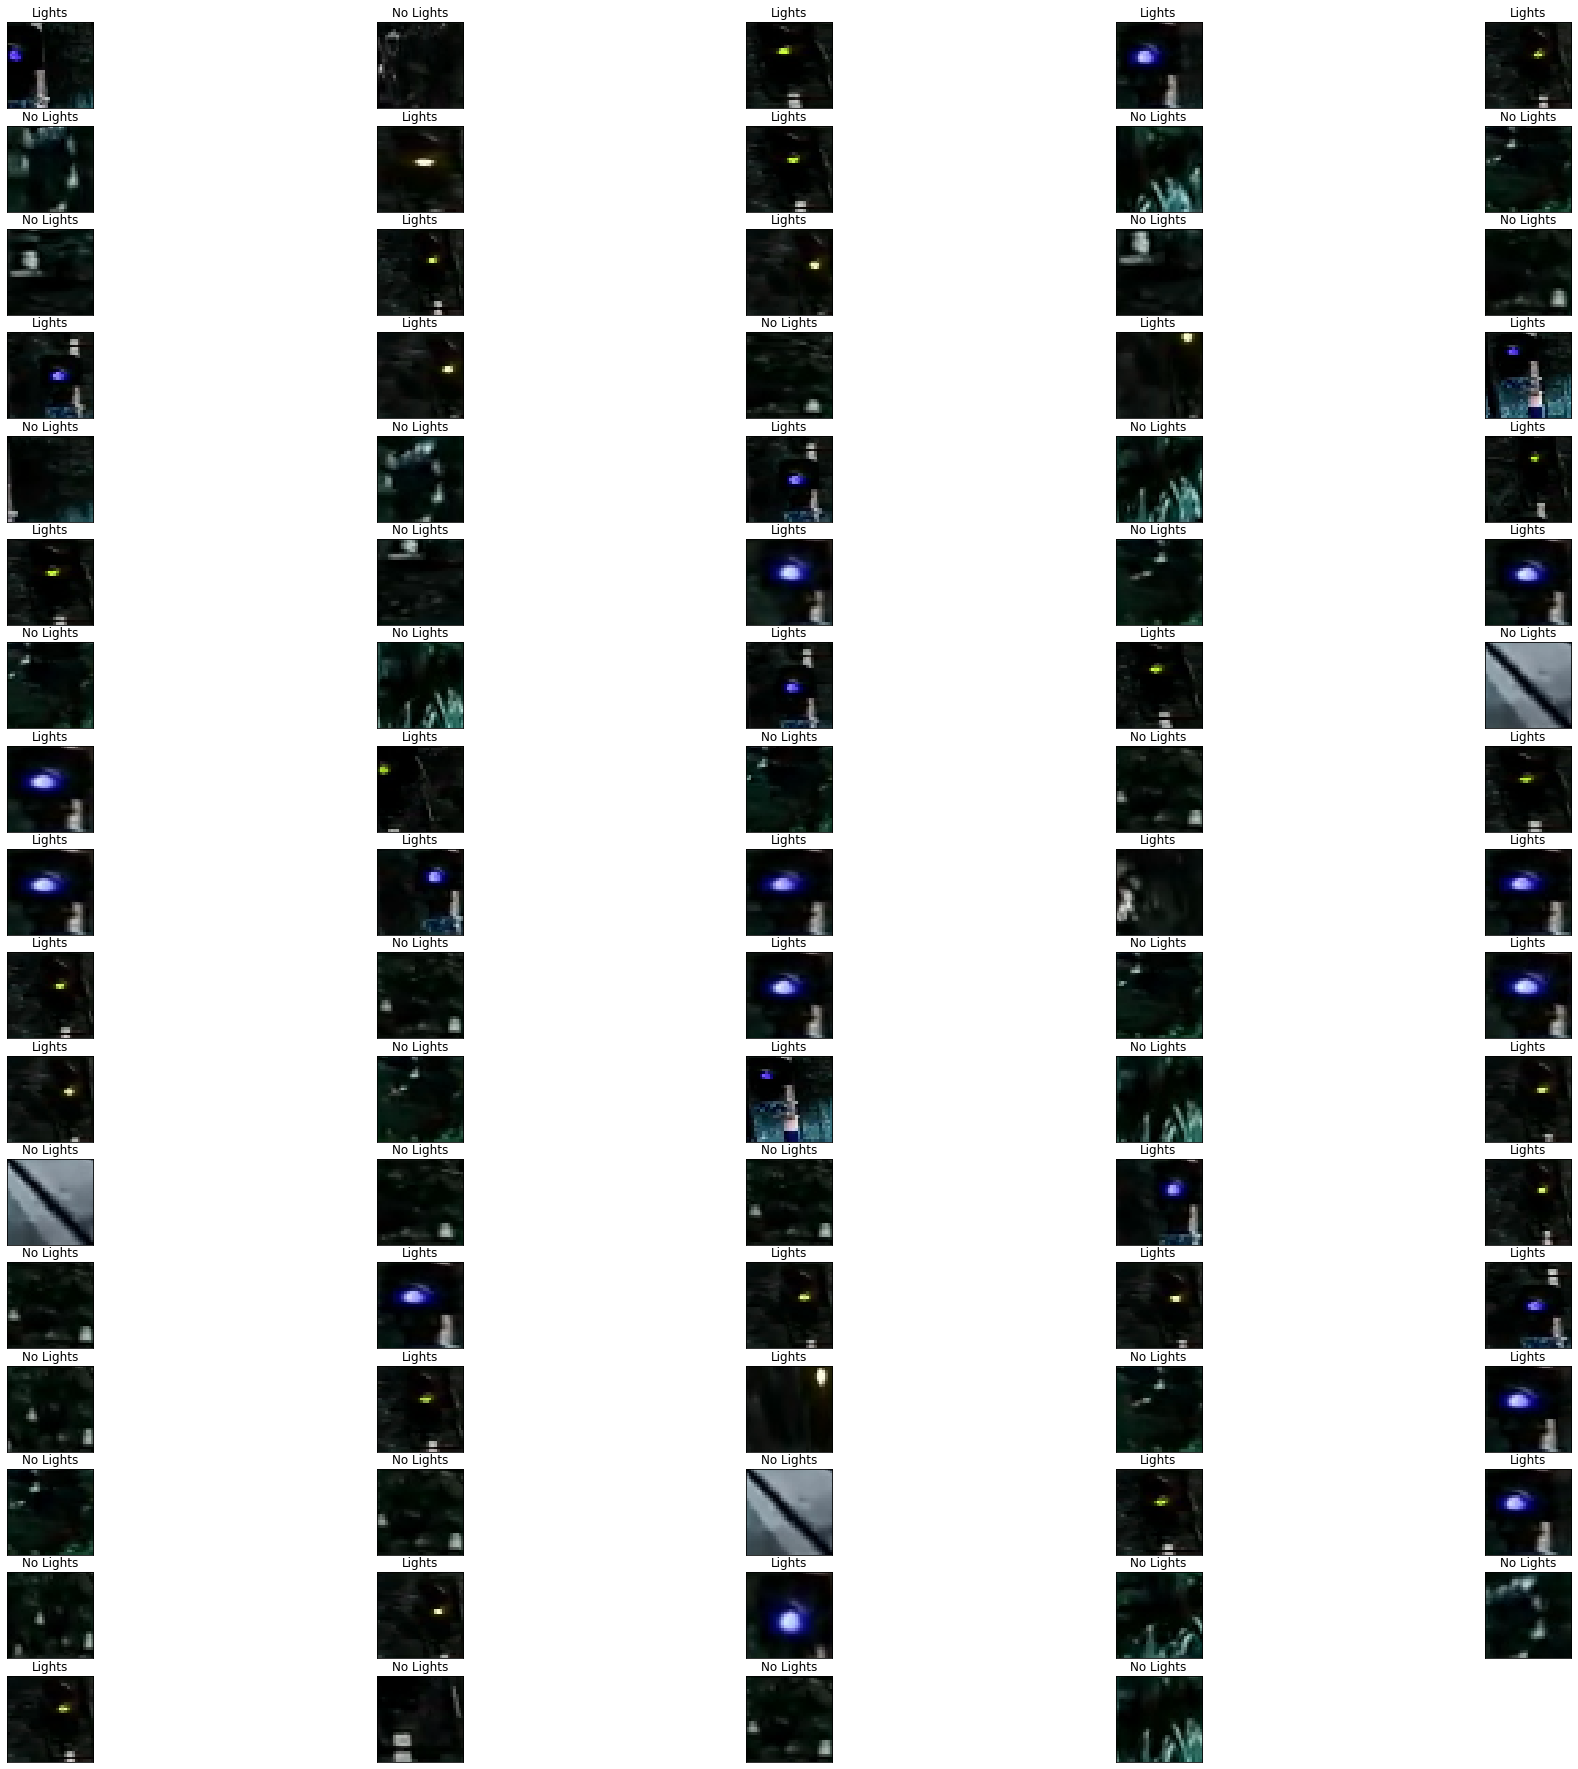

In [39]:
fig = plt.figure(figsize=(32,32))
plot_cols = 5
plot_rows = len(train_data)/plot_cols+1
for cnt, data in enumerate(train_data[:]):
    y = fig.add_subplot(plot_rows,plot_cols, cnt+1)
    img = data[0]
    data = img.reshape(-1,w,h,3)
    model_out = model.predict([data])
    
    if np.argmax(model_out) == 1:
        str_label = 'No Lights'
    else:
        str_label = 'Lights'
        
    y.imshow(img, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)    